In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
merged_data = pd.read_csv('../src/managers/data/merged_data.csv', index_col='Date', parse_dates=True)
yahoo_data = pd.read_csv('../src/managers/data/yahoo_data.csv', index_col='Date', parse_dates=True)
fred_data = pd.read_csv('../src/managers/data/fred_data.csv', index_col='Date', parse_dates=True)
processed_data = pd.read_csv('../src/managers/data/processed_data.csv', index_col='Date', parse_dates=True)

# Display the first few rows of the data
merged_data.head()

,CPIAUCSL,VIXCLS,TEDRATE,BAA10Y,DSPIC96,A229RX0,CMRMTSPL,INDPRO,IPFPNSS,IPFINAL,...,BAMLHYH0A0HYM2TRIV,BAMLCC0A0CMTRIV,DGS10,DGS2,DGS30,DGS5,DGS7,DGS1,DGS20,SPY
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,162.0,NaN,NaN,NaN,9022.9,32843.0,953719.0,84.1564,93.2884,91.3778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-02,NaN,23.42,0.63,1.54,NaN,NaN,NaN,NaN,NaN,NaN,...,345.77,940.25,5.67,5.59,5.86,5.63,5.68,5.46,5.94,97.56250
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,NaN,24.36,0.69,1.60,NaN,NaN,NaN,NaN,NaN,NaN,...,347.15,947.97,5.52,5.47,5.74,5.46,5.52,5.35,5.82,97.78125


In [30]:
# Get info and then convert it to a dataframe - and save it.
# Create dataframe then save it.
info_df = pd.DataFrame({
    'Column': merged_data.columns,
    'Data Types': merged_data.dtypes,
    'Non-Null Count': merged_data.notnull().sum()
})
info_df

,Column,Data Types,Non-Null Count
VIXCLS,VIXCLS,float64,6741
CPIAUCSL,CPIAUCSL,float64,320
DGS2,DGS2,float64,6684
DGS10,DGS10,float64,6684
DGS30,DGS30,float64,6684
...,...,...,...
DGS5,DGS5,float64,6684
DGS7,DGS7,float64,6684
DGS1,DGS1,float64,6684
DGS20,DGS20,float64,6684


In [31]:
# number of rows in merged
n_rows = merged_data.shape[0]
print(n_rows)
# Create a new column in info_df that looks at a % and sorts that new column descending
info_df['% Non-Null'] = info_df['Non-Null Count'] / n_rows
info_df.sort_values('% Non-Null', ascending=False)

9759


,Column,Data Types,Non-Null Count,% Non-Null
BAMLCC0A0CMTRIV,BAMLCC0A0CMTRIV,float64,6980,0.715237
BAMLHYH0A0HYM2TRIV,BAMLHYH0A0HYM2TRIV,float64,6980,0.715237
VIXCLS,VIXCLS,float64,6741,0.690747
VIXCLS.1,VIXCLS.1,float64,6741,0.690747
SPY,SPY,float64,6722,0.688800
...,...,...,...,...
NONREVNS,NONREVNS,float64,319,0.032688
CMRMTSPL,CMRMTSPL,float64,318,0.032585
MZMSL,MZMSL,float64,277,0.028384
AMBSL,AMBSL,float64,263,0.026949


In [17]:
# Split the data into features and targets
feature_columns = processed_data.columns[:processed_data.columns.get_loc('BAMLHYH0A0HYM2TRIV')]
target_columns = processed_data.columns[processed_data.columns.get_loc('BAMLHYH0A0HYM2TRIV'):]

# Create feature and target DataFrames
features = processed_data[feature_columns]
targets = processed_data[target_columns]

print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

print("\nFeature columns:")
print(feature_columns.tolist())

print("\nTarget columns:")
print(target_columns.tolist())


NameError: name 'processed_data' is not defined

In [18]:
# Select the first 10 features
first_10_features = features.iloc[:, :10]

# Normalize the data using Min-Max scaling
normalized_features = (first_10_features - first_10_features.min()) / (first_10_features.max() - first_10_features.min())

# Create a figure
plt.figure(figsize=(20, 10))
plt.title('First 10 Normalized Features Over Time', fontsize=16)

# Plot all features on the same plot
for column in normalized_features.columns:
    plt.plot(normalized_features.index, normalized_features[column], label=column)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'features' is not defined

In [19]:
# Calculate the correlation matrix for the features
correlation_matrix = features.corr()

# Create a figure
plt.figure(figsize=(20, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Display the top 10 most correlated feature pairs
print("Top 10 most correlated feature pairs:")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[sorted_pairs != 1.0]  # Exclude self-correlations
print(high_corr.head(10))


NameError: name 'features' is not defined

In general, high correlation between our features is not ideal. However, some of these correlations in the Top 10 are expected as the M2 Money Supply is extremely similar to the Real M2 Money Stock. And same thing for MZM Money Supply and M1 Money Supply. We have so many features that we may need to consider selecting one of these features within the high correlation pairs to reduce dimensionality and avoid multicollinearity.

In [32]:
"SPY" in merged_data.columns

True

In [33]:
yahoo_data.head()

,SPY
Date,
1993-01-29,43.93750
1993-02-01,44.25000
1993-02-02,44.34375
1993-02-03,44.81250
1993-02-04,45.00000


In [34]:
yahoo_data.tail()

,SPY
Date,
2024-09-16,562.840027
2024-09-17,563.070007
2024-09-18,561.400024
2024-09-19,570.979980
2024-09-20,567.179993


In [35]:
print(fred_data.shape)
fred_data.head()

(7152, 76)


,VIXCLS,CPIAUCSL,DGS2,DGS10,DGS30,VIXCLS.1,TEDRATE,BAA10Y,DSPIC96,A229RX0,...,PNFIC1,BAMLHYH0A0HYM2TRIV,BAMLCC0A0CMTRIV,DGS10.1,DGS2.1,DGS30.1,DGS5,DGS7,DGS1,DGS20
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,9022.9,32843.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-02,23.42,NaN,5.59,5.67,5.86,23.42,0.63,1.54,NaN,NaN,...,NaN,345.77,940.25,5.67,5.59,5.86,5.63,5.68,5.46,5.94
1998-01-05,24.36,NaN,5.47,5.52,5.74,24.36,0.69,1.60,NaN,NaN,...,NaN,347.15,947.97,5.52,5.47,5.74,5.46,5.52,5.35,5.82
1998-01-06,25.66,NaN,5.39,5.49,5.73,25.66,0.64,1.63,NaN,NaN,...,NaN,347.62,949.65,5.49,5.39,5.73,5.41,5.49,5.30,5.80
1998-01-07,25.07,NaN,5.42,5.55,5.80,25.07,0.60,1.62,NaN,NaN,...,NaN,347.42,946.33,5.55,5.42,5.80,5.45,5.55,5.31,5.88


In [4]:
# Look at the processed_data.
processed_data.head()

,CPIAUCSL,VIXCLS,TEDRATE,BAA10Y,DSPIC96,A229RX0,CMRMTSPL,INDPRO,IPFPNSS,IPFINAL,...,DGS5_6_mo_return_direction,DGS7_1_mo_return_direction,DGS7_3_mo_return_direction,DGS7_6_mo_return_direction,DGS1_1_mo_return_direction,DGS1_3_mo_return_direction,DGS1_6_mo_return_direction,DGS20_1_mo_return_direction,DGS20_3_mo_return_direction,DGS20_6_mo_return_direction
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,162.0,21.47,0.57,1.68,9022.9,32843.0,953719.0,84.1564,93.2884,91.3778,...,0,0,0,0,0,0,0,0,0,0
1998-02-28,162.0,18.55,0.50,1.67,9081.2,33029.0,967109.0,84.3066,93.5021,91.4979,...,0,1,0,0,1,0,0,1,0,0
1998-03-31,162.0,24.22,0.69,1.67,9134.4,33195.0,971898.0,84.3420,93.6295,91.6173,...,0,1,0,0,0,0,0,1,0,0
1998-04-30,162.2,21.18,0.85,1.66,9164.1,33271.0,973216.0,84.6339,94.0290,92.0431,...,0,0,1,0,0,1,0,1,1,0
1998-05-31,162.6,21.32,0.80,1.63,9202.0,33377.0,976540.0,85.1867,94.5829,92.4608,...,0,0,0,0,1,1,0,0,0,0


In [17]:
# Analyze the data for stationarity and other time series properties to ensure no adverse
# impacts to our classical ML models
from statsmodels.tsa.stattools import adfuller

# Create a function to test for stationarity
def test_for_stationarity(data):
    # Perform Dickey-Fuller test:
    adf_test = adfuller(data, autolag='AIC')

    # Extract and display test results in a user friendly manner
    results = pd.Series(adf_test[0:4], index=['Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    return results

In [26]:
p_val_threshold = 0.05
stationary_tests = {}

for col in processed_data.columns:
    # print(f"Testing stationarity of {col}:")
    try:
        results = test_for_stationarity(processed_data[col])
        # Use the name of the Col as a row index and paste the series into the dictionary
        stationary_tests[col] = {
            'Test Statistic': results['Test Statistic'],
            'P-Value': results['P-Value'],
            # Check if p-value is NaN, if so - make it equal to UNK. Otherwise, check against threshold
            'Stationary': 'UNK' if pd.isnull(results['P-Value']) else results['P-Value'] < p_val_threshold
        }
    except Exception as e:
        print(f"Missing data found in {col}.")

# Convert the dictionary to a DataFrame
stationary_df = pd.DataFrame(stationary_tests).T
stationary_df

Missing data found in TEDRATE.
Missing data found in DSPIC96.
Missing data found in A229RX0.
Missing data found in CMRMTSPL.
Missing data found in ISRATIO.
Missing data found in M1SL.
Missing data found in M2SL.
Missing data found in M2REAL.
Missing data found in AMBSL.
Missing data found in MZMSL.
Missing data found in NONREVNS.
Missing data found in REVOLNS.
Missing data found in PNFIC1.
Missing data found in BAMLHYH0A0HYM2TRIV_1_mo_return.
Missing data found in BAMLHYH0A0HYM2TRIV_3_mo_return.
Missing data found in BAMLHYH0A0HYM2TRIV_6_mo_return.
Missing data found in BAMLCC0A0CMTRIV_1_mo_return.
Missing data found in BAMLCC0A0CMTRIV_3_mo_return.
Missing data found in BAMLCC0A0CMTRIV_6_mo_return.
Missing data found in DGS10_1_mo_return.
Missing data found in DGS10_3_mo_return.
Missing data found in DGS10_6_mo_return.
Missing data found in DGS2_1_mo_return.
Missing data found in DGS2_3_mo_return.
Missing data found in DGS2_6_mo_return.
Missing data found in DGS30_1_mo_return.
Missing 

,Test Statistic,P-Value,Stationary
CPIAUCSL,NaN,NaN,UNK
VIXCLS,-5.917054,0.0,True
BAA10Y,-3.519085,0.00751,True
INDPRO,NaN,NaN,UNK
IPFPNSS,NaN,NaN,UNK
...,...,...,...
DGS1_3_mo_return_direction,-3.485645,0.008364,True
DGS1_6_mo_return_direction,-3.415689,0.010436,True
DGS20_1_mo_return_direction,-17.644411,0.0,True
DGS20_3_mo_return_direction,-9.094317,0.0,True


In [27]:
# Group by the Stationary column and count the number of True and False values
stationary_df['Stationary'].value_counts()

UNK      48
True     30
False     9
Name: Stationary, dtype: int64

In [28]:
stationary_df[stationary_df['Stationary'] == False]

,Test Statistic,P-Value,Stationary
BAMLHYH0A0HYM2TRIV,1.004125,0.994309,False
BAMLCC0A0CMTRIV,-0.311618,0.923843,False
DGS10,-2.013258,0.28079,False
DGS2,-2.379686,0.147552,False
DGS30,-1.96846,0.300571,False
DGS5,-2.089121,0.248911,False
DGS7,-1.960139,0.304319,False
DGS20,-1.821596,0.369794,False
SPY,2.395707,0.999008,False


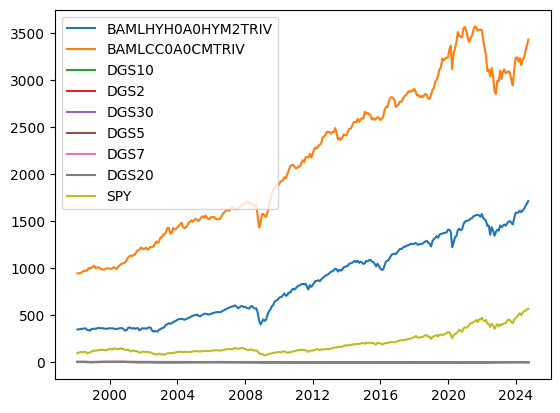

In [31]:
# Plot the non-stationary columns
non_stationary_cols = stationary_df[stationary_df['Stationary'] == False].index
non_stationary_data = processed_data[non_stationary_cols]
# Add a legend to the plot
plt.plot(non_stationary_data)
plt.legend(non_stationary_data.columns, loc='upper left')
plt.show()